In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

## for block length 1 and t = 0 (missing data placement)

In [42]:
result = pd.read_csv('result_output/result_block1wot1_action_selection.csv', index_col= 0)
result.head()

,mean_fill (global),mean_fill (individual),tr_mean_fill (global),tr_mean_fill (individual),KNN_fill,cluster_fill,DR_fill,original_data
patient_id,,,,,,,,
0,451,450,470,489,463,454,474,476
1,850,831,824,840,831,829,837,841
2,330,327,516,554,194,523,506,471
3,962,937,946,942,950,946,958,953
4,612,586,592,609,619,627,604,618


In [44]:
missing_patient_id = [2, 16, 26, 54, 55, 73, 75, 86, 93, 95]
result = result.loc[missing_patient_id]

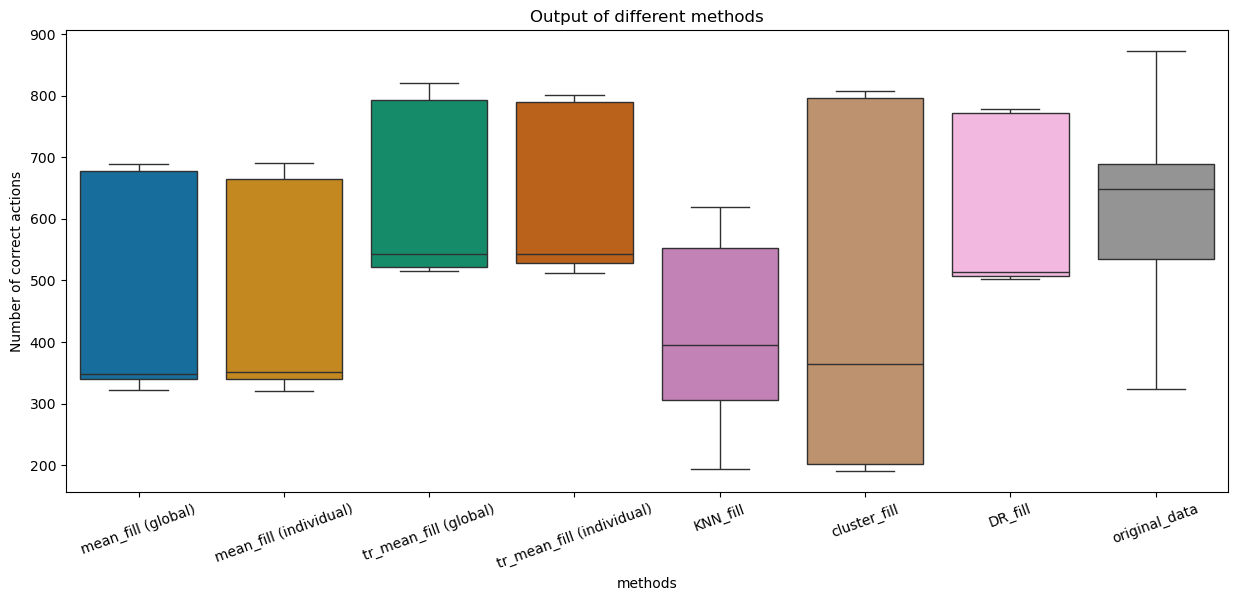

In [45]:
df_melted = result.melt(var_name='Columns', value_name='Values')

# Create a box plot with Seaborn
plt.figure(figsize=(15, 6))
sns.boxplot(x='Columns', y='Values', data=df_melted, hue='Columns', palette='colorblind')

# Add title and labels
plt.title('Output of different methods')
plt.xlabel('methods')
plt.xticks(rotation=20)
plt.ylabel('Number of correct actions')

# Show the plot
plt.show()

In [11]:
para_estimation = pd.read_csv('result_output/result_block1wot1_estimation.csv', index_col= 0)
para_estimation

,method,posterior mean of treatment 0,treatment 0 lower bound (95%),treatment 0 upper bound (95%),posterior mean of treatment 0 (original data ),posterior mean of treatment 1,treatment 1 lower bound (95%),treatment 1 upper bound (95%),posterior mean of treatment 1 (original data )
0,mean_fill (global),1.975018,1.974184,1.975852,1.976902,-0.076350,-0.078153,-0.074547,-0.064128
1,mean_fill (individual),1.975022,1.974237,1.975808,1.976902,-0.075740,-0.077541,-0.073938,-0.064128
2,tr_mean_fill (global),1.984350,1.983498,1.985201,1.976902,-0.133057,-0.134563,-0.131551,-0.064128
3,tr_mean_fill (individual),1.984634,1.983803,1.985465,1.976902,-0.132928,-0.134444,-0.131411,-0.064128
4,KNN_fill,1.969999,1.969238,1.970761,1.976902,-0.067396,-0.069291,-0.065500,-0.064128
5,cluster_fill,1.983746,1.982958,1.984535,1.976902,-0.050857,-0.052732,-0.048983,-0.064128
6,DR_fill,1.983251,1.982414,1.984088,1.976902,-0.128764,-0.130240,-0.127289,-0.064128


In [40]:
df = pd.read_pickle('result_output/result_block1wot1_raw.pkl')
df

mean_fill (global)                                              \
    mean of treatment 0 mean of treatment 1 variance of treatment 0   
0              1.978751           -0.065892                0.002208   
1              1.992524           -0.107159                0.002174   
2              1.970533           -0.077377                0.002155   
3              1.979331           -0.106081                0.002151   
4              1.971504           -0.044637                0.002188   
..                  ...                 ...                     ...   
995            1.985713           -0.097270                0.002188   
996            1.979062           -0.114994                0.002155   
997            1.964867           -0.091138                0.002169   
998            1.982925           -0.088808                0.002183   
999            2.007700           -0.064821                0.002179   

                            mean_fill (individual)                      \
    variance of treatment 1    mean of treatment 0 mean of treatment 1   
0                  0.006711               1.974690           -0.092966   
1                  0.007042               1.973697           -0.074783   
2                  0.007246               1.981928           -0.071200   
3                  0.007299               1.992707           -0.104980   
4                  0.006897               1.981259           -0.028660   
..                      ...                    ...                 ...   
995                0.006897               1.975196           -0.094892   
996                0.007246               1.989015           -0.110489   
997                0.007092               1.962598           -0.098480   
998                0.006944               1.967730           -0.051546   
999                0.006993               1.980789           -0.095788   

                                                    tr_mean_fill (global)  \
    variance of treatment 0 variance of treatment 1   mean of treatment 0   
0                  0.002169                0.007092              1.985232   
1                  0.002160                0.007194              2.015252   
2                  0.002174                0.007042              1.961206   
3                  0.002141                0.007407              1.983744   
4                  0.002198                0.006803              2.000165   
..                      ...                     ...                   ...   
995                0.002165                0.007143              2.011934   
996                0.002160                0.007194              1.971420   
997                0.002183                0.006944              1.984997   
998                0.002169                0.007092              1.995559   
999                0.002183                0.006944              1.985614   

                         ...                KNN_fill                          \
    mean of treatment 1  ... variance of treatment 0 variance of treatment 1   
0             -0.123283  ...                0.002193                0.006849   
1             -0.125298  ...                0.002160                0.007194   
2             -0.141784  ...                0.002183                0.006944   
3             -0.091441  ...                0.002193                0.006849   
4             -0.146595  ...                0.002193                0.006849   
..                  ...  ...                     ...                     ...   
995           -0.142900  ...                0.002203                0.006757   
996           -0.124310  ...                0.002198                0.006803   
997           -0.083763  ...                0.002193                0.006849   
998           -0.109966  ...                0.002198                0.006803   
999           -0.118225  ...                0.002193                0.006849   

           cluster_fill                                              \
    

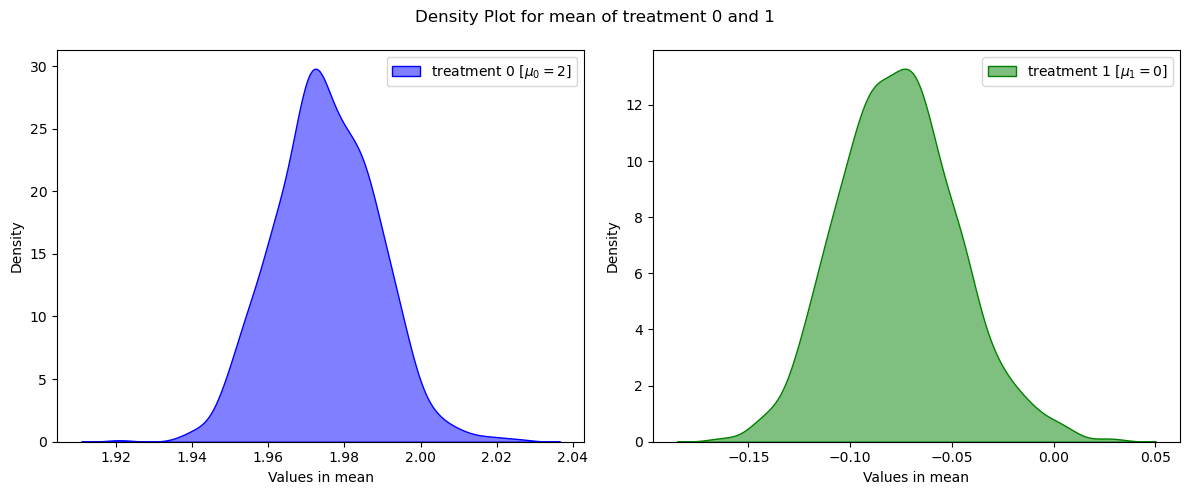

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
#sns.kdeplot(df['mean_fill (global)']['mean of treatment 0'], fill=True)
sns.kdeplot(df['mean_fill (global)']['mean of treatment 0'], fill=True, color='blue', 
            label=r'treatment 0 [$\mu_0 = 2$]', alpha=0.5, ax = axs[0])

axs[0].set_xlabel('Values in mean')
axs[0].set_ylabel('Density')
axs[0].legend(loc='upper right')

sns.kdeplot(df['mean_fill (global)']['mean of treatment 1'], fill=True, color='green', 
            label=r'treatment 1 [$\mu_1 = 0$]', alpha=0.5, ax = axs[1])

axs[1].set_xlabel('Values in mean')
axs[1].set_ylabel('Density')
axs[1].legend(loc='upper right')

fig.suptitle('Density Plot for mean of treatment 0 and 1')

fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

## for block length 1 and t = 3 (missing data placement)

In [46]:
result = pd.read_csv('result_output/result_block1wot4_action_selection.csv', index_col= 0)
result.head()

,mean_fill (global),mean_fill (individual),tr_mean_fill (global),tr_mean_fill (individual),KNN_fill,cluster_fill,DR_fill,original_data
patient_id,,,,,,,,
0,970,969,975,968,973,977,964,973
1,952,962,961,961,960,962,957,965
2,810,740,826,764,757,856,833,919
3,916,920,908,927,915,926,910,936
4,991,992,991,993,993,989,991,992


In [47]:
result = result.loc[missing_patient_id]

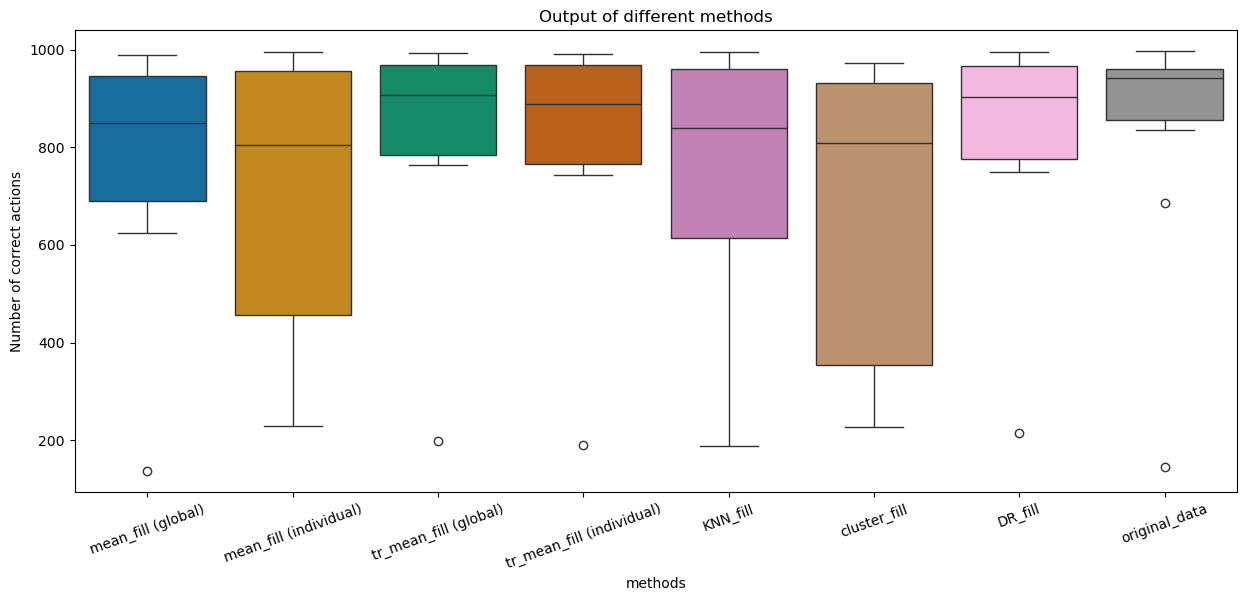

In [48]:
df_melted = result.melt(var_name='Columns', value_name='Values')

# Create a box plot with Seaborn
plt.figure(figsize=(15, 6))
sns.boxplot(x='Columns', y='Values', data=df_melted, hue='Columns', palette='colorblind')

# Add title and labels
plt.title('Output of different methods')
plt.xlabel('methods')
plt.xticks(rotation=20)
plt.ylabel('Number of correct actions')

# Show the plot
plt.show()

In [12]:
para_estimation = pd.read_csv('result_output/result_block1wot4_estimation.csv', index_col= 0)
para_estimation

,method,posterior mean of treatment 0,treatment 0 lower bound (95%),treatment 0 upper bound (95%),posterior mean of treatment 0 (original data ),posterior mean of treatment 1,treatment 1 lower bound (95%),treatment 1 upper bound (95%),posterior mean of treatment 1 (original data )
0,mean_fill (global),1.961481,1.960960,1.962003,1.976902,-0.069036,-0.069880,-0.068193,-0.064128
1,mean_fill (individual),1.954125,1.953610,1.954640,1.976902,-0.078417,-0.079345,-0.077489,-0.064128
2,tr_mean_fill (global),1.971635,1.971088,1.972182,1.976902,-0.079487,-0.080247,-0.078726,-0.064128
3,tr_mean_fill (individual),1.971141,1.970567,1.971715,1.976902,-0.077404,-0.078158,-0.076651,-0.064128
4,KNN_fill,1.964916,1.964389,1.965444,1.976902,-0.076546,-0.077431,-0.075662,-0.064128
5,cluster_fill,1.941291,1.940799,1.941783,1.976902,-0.078244,-0.079226,-0.077261,-0.064128
6,DR_fill,1.971169,1.970611,1.971726,1.976902,-0.079348,-0.080070,-0.078625,-0.064128


In [26]:
df = pd.read_pickle('result_output/result_block1wot4_raw.pkl')

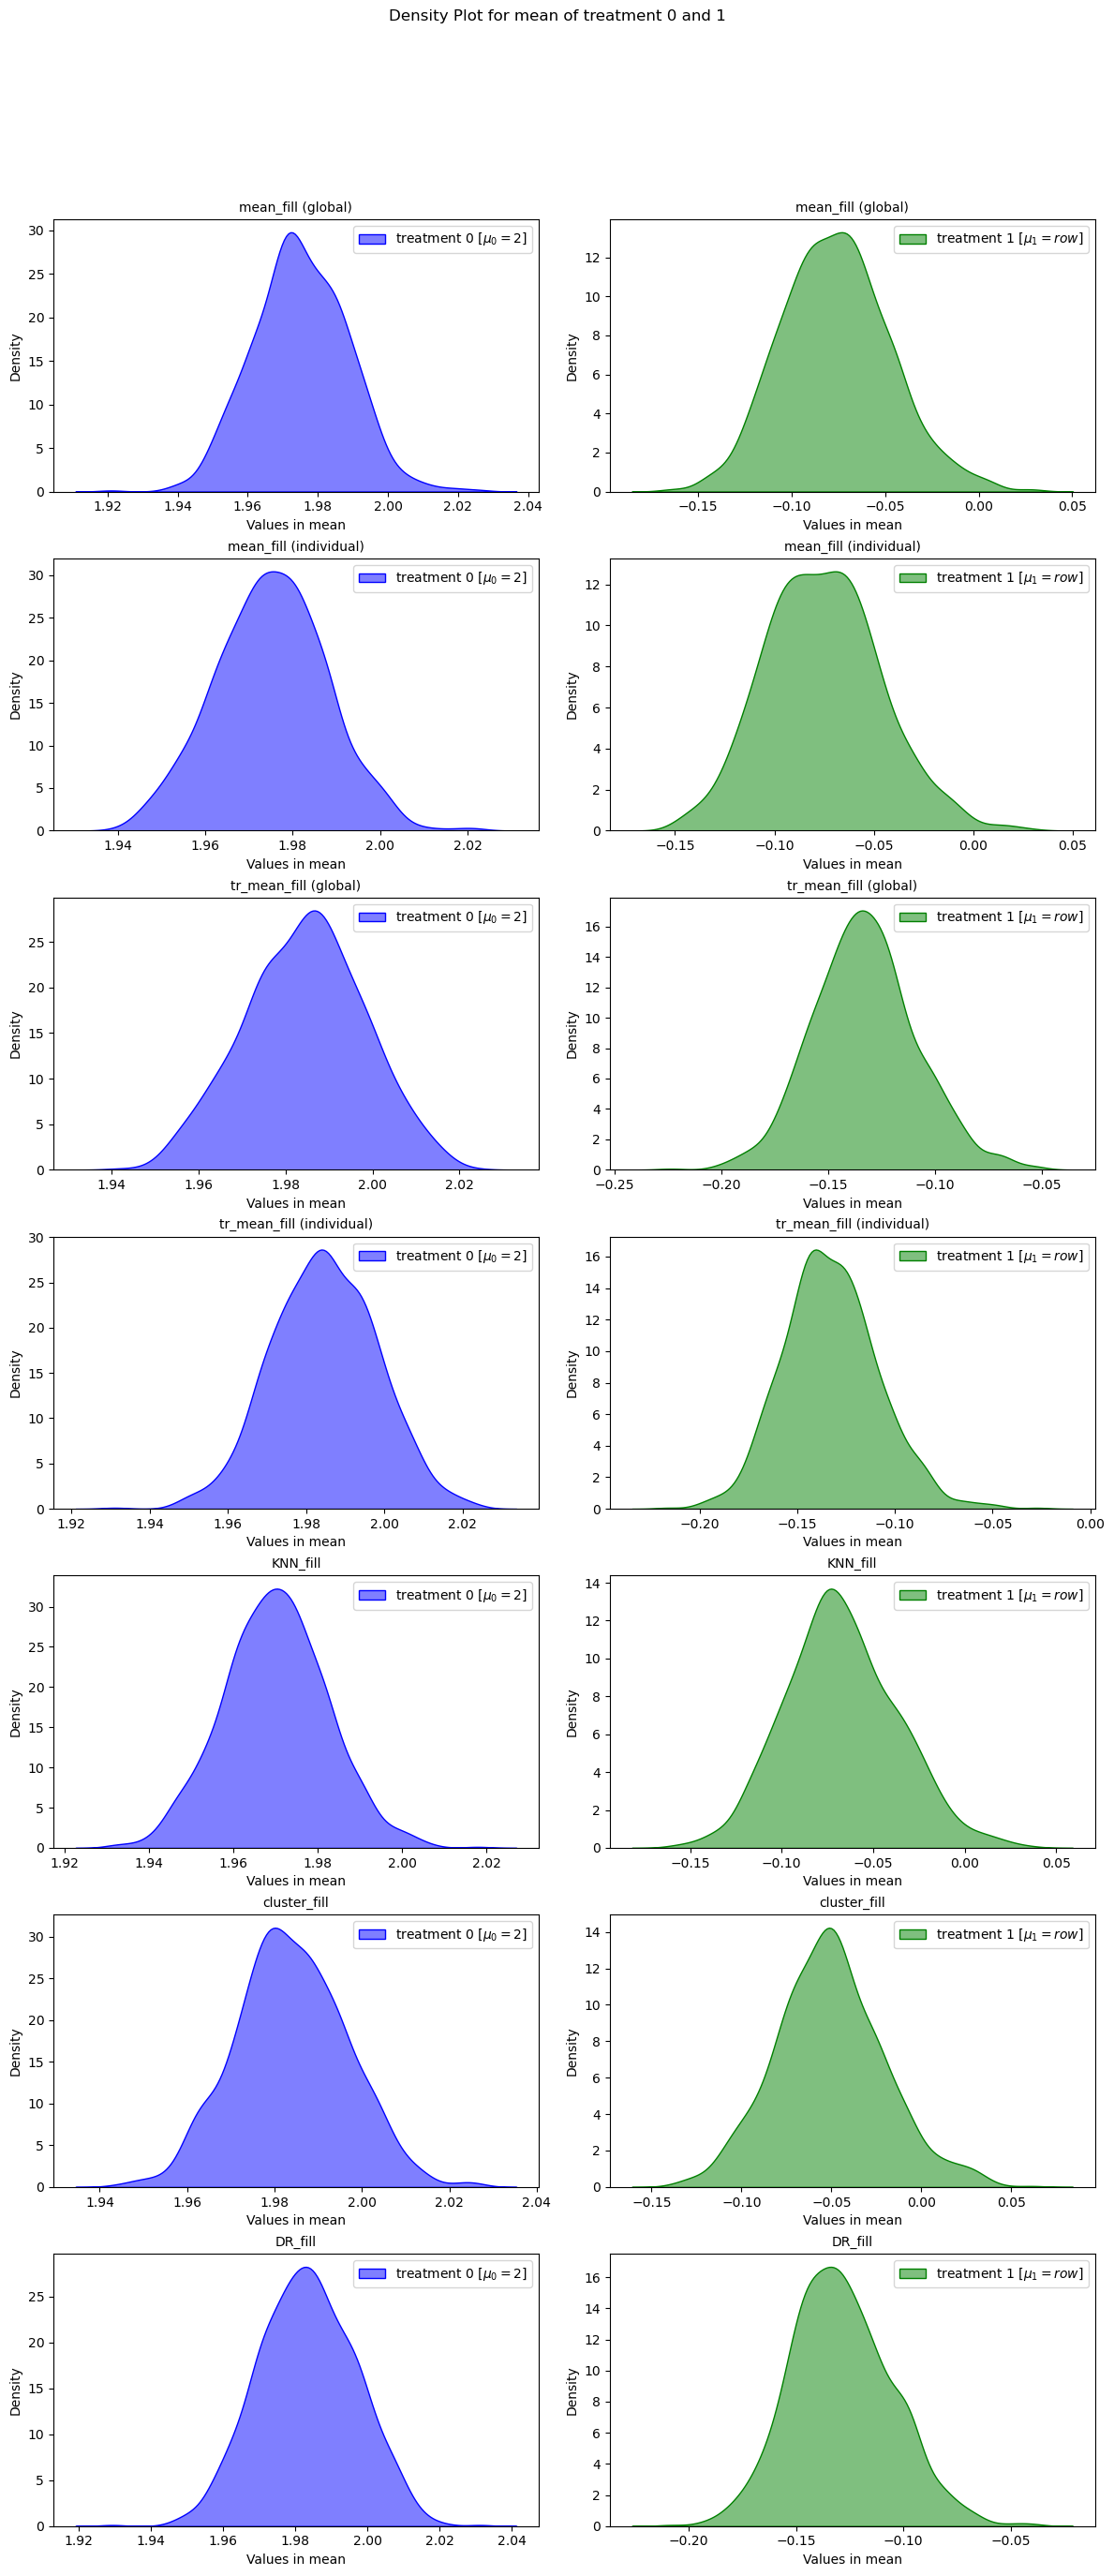

In [63]:

fig, axs = plt.subplots(7, 2, figsize=(12, 28))

# List of row titles
row_titles = ["mean_fill (global)", "mean_fill (individual)", "tr_mean_fill (global)", "tr_mean_fill (individual)", 
              "KNN_fill", "cluster_fill","DR_fill"]

for row in range(7):
    sns.kdeplot(df[row_titles[row]]['mean of treatment 0'], fill=True, color='blue', 
            label=r'treatment 0 [$\mu_0 = 2$]', alpha=0.5, ax = axs[row,0])

    axs[row, 0].set_xlabel('Values in mean')
    axs[row, 0].set_ylabel('Density')
    axs[row, 0].legend(loc='upper right')
    axs[row, 0].set_title(row_titles[row], fontsize = 10)
    
    sns.kdeplot(df[row_titles[row]]['mean of treatment 1'], fill=True, color='green', 
            label=r'treatment 1 [$\mu_1 = row$]', alpha=0.5, ax = axs[row,1])

    axs[row,1].set_xlabel('Values in mean')
    axs[row,1].set_ylabel('Density')
    axs[row,1].legend(loc='upper right')
    axs[row, 1].set_title(row_titles[row], fontsize = 10)

fig.suptitle('Density Plot for mean of treatment 0 and 1', fontsize = 12)

fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

## for block length 5 and t = 0 (missing data placement)

In [55]:
result = pd.read_csv('result_output/result_block5wot25_action_selection.csv', index_col= 'patient_id')
result.head()

,Unnamed: 0,mean_fill (global),mean_fill (individual),tr_mean_fill (global),tr_mean_fill (individual),KNN_fill,cluster_fill,DR_fill,original_data
patient_id,,,,,,,,,
0,0,964,962,971,956,954,958,958,964
1,1,986,969,971,974,968,976,971,972
2,2,967,966,968,969,967,964,966,972
3,3,1000,1000,1000,1000,1000,1000,1000,1000
4,4,1000,1000,1000,1000,1000,1000,1000,1000


In [58]:
result = result.drop('Unnamed: 0', axis = 1)

In [ ]:
missing_patient_id = [ 0,  2,  3,  4,  7,  9, 10, 11, 12, 13, 15, 18, 19, 20, 21, 23, 24,
       26, 28, 30, 31, 34, 35, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 50,
       52, 54, 55, 56, 57, 59, 60, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72,
       73, 74, 75, 77, 78, 80, 83, 84, 85, 87, 88, 89, 90, 92, 93, 95, 96,
       97, 98]

In [59]:
result = result.loc[missing_patient_id]

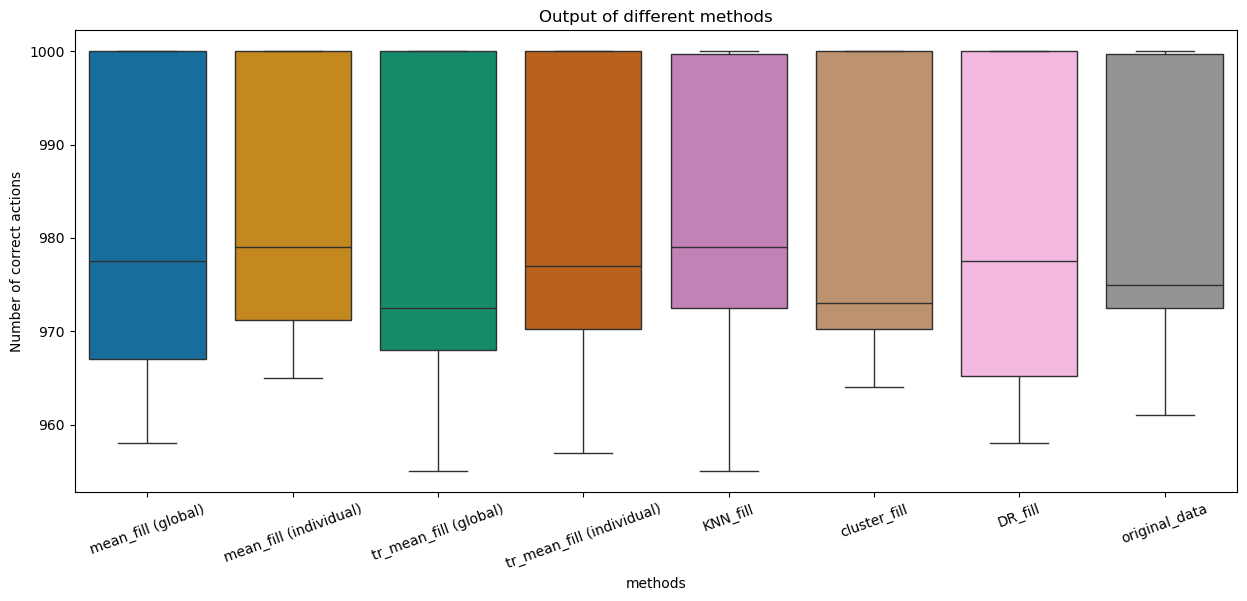

In [60]:
df_melted = result.melt(var_name='Columns', value_name='Values')

# Create a box plot with Seaborn
plt.figure(figsize=(15, 6))
sns.boxplot(x='Columns', y='Values', data=df_melted, hue='Columns', palette='colorblind')

# Add title and labels
plt.title('Output of different methods')
plt.xlabel('methods')
plt.xticks(rotation=20)
plt.ylabel('Number of correct actions')

# Show the plot
plt.show()